<a href="https://colab.research.google.com/github/samdani47/Aviation_Anomaly_Detection/blob/main/Anomaly_detection_FD004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# **Uploading File**

In [55]:

# File Path (Make sure it's correct!)
#file_path = r"F:\Desktop Files\Final Yr Project\NASA Turbofan Jet Engine Data Set\CMaps\test_FD004.txt"

from google.colab import drive
drive.mount('/content/drive')

# Column Names
column_names = [
    "unit", "time", "operational_setting_1", "operational_setting_2", "operational_setting_3",
    "sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5",
    "sensor_6", "sensor_7", "sensor_8", "sensor_9", "sensor_10",
    "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15",
    "sensor_16", "sensor_17", "sensor_18", "sensor_19", "sensor_20", "sensor_21"
]

file_path = "/content/drive/MyDrive/CMaps/train_FD004.txt"
df = pd.read_csv(file_path, delim_whitespace=True, header=None)
print(df.head())  # Check first few rows

# Remove empty spaces that might be caused by inconsistent spacing in text file
df = df.dropna(axis=1, how="all")

# Show first few rows
print(df.head())

import os
print(os.path.exists(file_path))  # Should print Tru

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-55-b8a6870a4f6d>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


   0   1        2       3      4       5       6        7        8     9   \
0   1   1  42.0049  0.8400  100.0  445.00  549.68  1343.43  1112.93  3.91   
1   1   2  20.0020  0.7002  100.0  491.19  606.07  1477.61  1237.50  9.35   
2   1   3  42.0038  0.8409  100.0  445.00  548.95  1343.12  1117.05  3.91   
3   1   4  42.0000  0.8400  100.0  445.00  548.70  1341.24  1118.03  3.91   
4   1   5  25.0063  0.6207   60.0  462.54  536.10  1255.23  1033.59  7.05   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  129.78  2387.99  8074.83   9.3335  0.02  330  2212  100.00  10.62   
1  ...  312.59  2387.73  8046.13   9.1913  0.02  361  2324  100.00  24.37   
2  ...  129.62  2387.97  8066.62   9.4007  0.02  329  2212  100.00  10.48   
3  ...  129.80  2388.02  8076.05   9.3369  0.02  328  2212  100.00  10.54   
4  ...  164.11  2028.08  7865.80  10.8366  0.02  305  1915   84.93  14.03   

        25  
0   6.3670  
1  14.6552  
2   6.4213  
3   6.4176  
4   8.675

In [56]:
# Display first few rows
print(df.head())

# Check dataset shape (rows, columns)
df.shape

# Check column names
df.columns.tolist()

# Check for missing values
df.isnull().sum()


   0   1        2       3      4       5       6        7        8     9   \
0   1   1  42.0049  0.8400  100.0  445.00  549.68  1343.43  1112.93  3.91   
1   1   2  20.0020  0.7002  100.0  491.19  606.07  1477.61  1237.50  9.35   
2   1   3  42.0038  0.8409  100.0  445.00  548.95  1343.12  1117.05  3.91   
3   1   4  42.0000  0.8400  100.0  445.00  548.70  1341.24  1118.03  3.91   
4   1   5  25.0063  0.6207   60.0  462.54  536.10  1255.23  1033.59  7.05   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  129.78  2387.99  8074.83   9.3335  0.02  330  2212  100.00  10.62   
1  ...  312.59  2387.73  8046.13   9.1913  0.02  361  2324  100.00  24.37   
2  ...  129.62  2387.97  8066.62   9.4007  0.02  329  2212  100.00  10.48   
3  ...  129.80  2388.02  8076.05   9.3369  0.02  328  2212  100.00  10.54   
4  ...  164.11  2028.08  7865.80  10.8366  0.02  305  1915   84.93  14.03   

        25  
0   6.3670  
1  14.6552  
2   6.4213  
3   6.4176  
4   8.675

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [57]:
df.columns

df.columns = column_names
df.head()

,unit,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [58]:
df.index

df.reset_index(inplace=True)
print(df.index)


RangeIndex(start=0, stop=61249, step=1)


# **Plotting the Data**

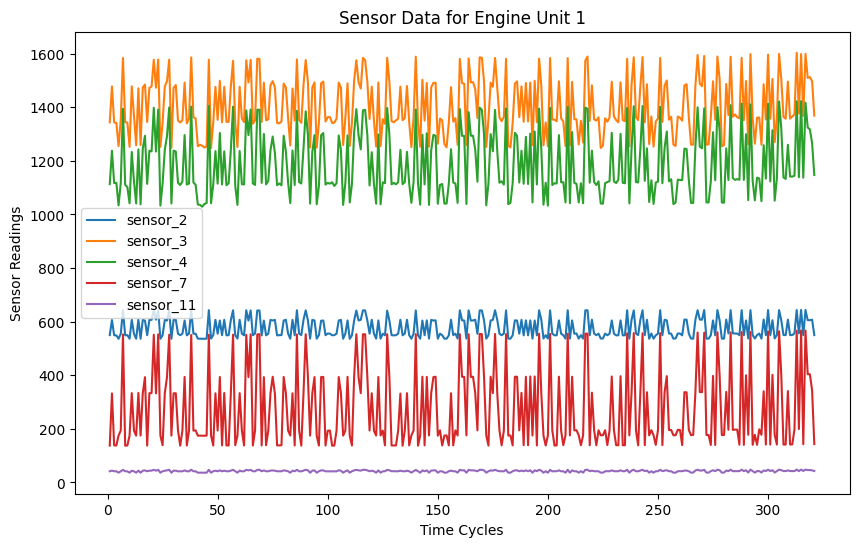

In [59]:
import matplotlib.pyplot as plt

# Select data for engine unit 1
engine_1 = df[df["unit"] == 1]

# Choose a few key sensors to visualize
sensors = ["sensor_2", "sensor_3", "sensor_4", "sensor_7", "sensor_11"]

plt.figure(figsize=(10, 6))
for sensor in sensors:
    plt.plot(engine_1["time"], engine_1[sensor], label=sensor)

plt.xlabel("Time Cycles")
plt.ylabel("Sensor Readings")
plt.title("Sensor Data for Engine Unit 1")
plt.legend()
plt.show()

In [60]:
# List of columns to drop
drop_cols = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3',
             'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18']

# Drop the columns
df.drop(columns=drop_cols, inplace=True)

# Display updated dataframe
df.head()


,index,unit,time,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_19,sensor_20,sensor_21
0,0,1,1,549.68,1343.43,1112.93,5.70,137.36,2211.86,8311.32,41.69,129.78,2387.99,8074.83,9.3335,330,100.00,10.62,6.3670
1,1,1,2,606.07,1477.61,1237.50,13.61,332.10,2323.66,8713.60,43.94,312.59,2387.73,8046.13,9.1913,361,100.00,24.37,14.6552
2,2,1,3,548.95,1343.12,1117.05,5.69,138.18,2211.92,8306.69,41.66,129.62,2387.97,8066.62,9.4007,329,100.00,10.48,6.4213
3,3,1,4,548.70,1341.24,1118.03,5.70,137.98,2211.88,8312.35,41.68,129.80,2388.02,8076.05,9.3369,328,100.00,10.54,6.4176
4,4,1,5,536.10,1255.23,1033.59,9.00,174.82,1915.22,7994.94,36.48,164.11,2028.08,7865.80,10.8366,305,84.93,14.03,8.6754


# **Creating Sequences for LSTM**

In [61]:
import numpy as np

# Define sequence length
sequence_length = 50  # Use past 50 cycles to predict next state

# Convert dataframe to numpy array
data = df.drop(columns=['unit', 'time']).values

# Create sequences
X_sequences = []
for i in range(len(data) - sequence_length):
    X_sequences.append(data[i: i + sequence_length])

# Convert to NumPy array
X_sequences = np.array(X_sequences)

# Print shape of final dataset
print("Final shape of sequences:", X_sequences.shape)  # (num_samples, sequence_length, num_features)


Final shape of sequences: (61199, 50, 17)


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_sequences.reshape(-1, X_sequences.shape[-1])).reshape(X_sequences.shape)


In [63]:
X_scaled.shape

(61199, 50, 17)

# **Building the LSTM Autoencoder**

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

# Define model parameters
timesteps = 50  # Sequence length
features = 17   # Number of sensor readings

# Encoder
input_layer = Input(shape=(timesteps, features))
encoded = LSTM(64, activation='relu', return_sequences=True)(input_layer)
encoded = LSTM(32, activation='relu', return_sequences=False)(encoded)

# Bottleneck layer
bottleneck = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(32, activation='relu', return_sequences=True)(bottleneck)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
output_layer = TimeDistributed(Dense(features))(decoded)

# Compile Model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Model Summary
autoencoder.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 50, 17)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 50, 64)              │          20,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_7 (RepeatVector)       │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 50, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 50, 17)              │           1,105 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,665 (264.32 KB)

 Trainable params: 67,665 (264.32 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
print("Min values:", X_sequences.min())
print("Max values:", X_sequences.max())


Min values: 0.0
Max values: 61247.0


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_sequences = scaler.fit_transform(X_sequences.reshape(-1, X_sequences.shape[-1])).reshape(X_sequences.shape)

# Check new min/max values
print("After scaling - Min:", X_sequences.min(), "Max:", X_sequences.max())


After scaling - Min: 0.0 Max: 1.0000000000000002


In [67]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and validation (20%)
X_train, X_val = train_test_split(X_sequences, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Training shape: (48959, 50, 17)
Validation shape: (12240, 50, 17)


# **Model Training**

In [68]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense


# from tensorflow.keras.optimizers import Adam

# # Use a smaller LSTM model
# input_layer = Input(shape=(50, 17))
# encoded = LSTM(32, activation='relu', return_sequences=False)(input_layer)
# bottleneck = RepeatVector(50)(encoded)
# decoded = LSTM(32, activation='relu', return_sequences=True)(bottleneck)
# output_layer = TimeDistributed(Dense(17))(decoded)

# # Define and compile the model
# autoencoder = Model(input_layer, output_layer)
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Train with a smaller batch size
# history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=16, validation_data=(X_val, X_val))






## **Saving the model to avoid retraining**

In [69]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.save("autoencoder_model.h5")





# **Reload the trained model**

In [70]:


from tensorflow.keras.models import load_model
import keras.losses

# Define custom_objects to map 'mse' to its actual function
custom_objects = {"mse": keras.losses.MeanSquaredError()}

# Load the model with custom_objects
autoencoder = load_model("autoencoder_model.h5", custom_objects=custom_objects)



In [71]:
print("Total epochs trained:", len(history.history['loss']))
print(history)



Total epochs trained: 10


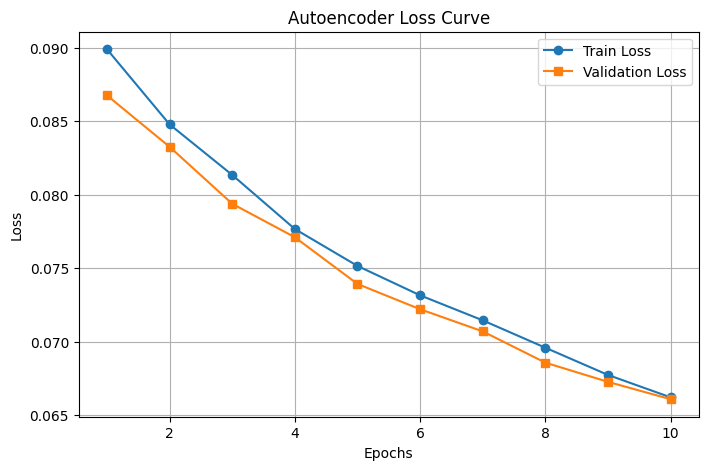

In [72]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Loss Curve')
plt.grid(True)
plt.show()




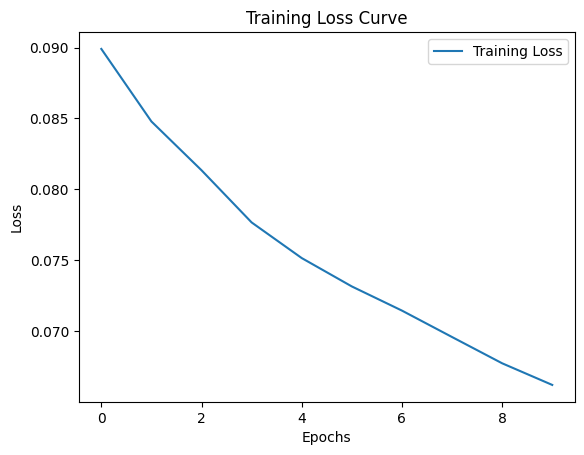

In [73]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curve')
plt.show()


# **Threshold for anomaly detection**

In [75]:
import pandas as pd

test_data = pd.read_csv('/content/drive/MyDrive/CMaps/test_FD004.txt', sep=' ', header=None)
test_data.dropna(axis=1, inplace=True)  # Remove empty columns if needed
print(test_data.head())  # Verify the first few rows




   0   1        2       3      4       5       6        7        8     9   \
0   1   1  20.0072  0.7000  100.0  491.19  606.67  1481.04  1227.81  9.35   
1   1   2  24.9984  0.6200   60.0  462.54  536.22  1256.17  1031.48  7.05   
2   1   3  42.0000  0.8420  100.0  445.00  549.23  1340.13  1105.88  3.91   
3   1   4  42.0035  0.8402  100.0  445.00  549.19  1339.70  1107.26  3.91   
4   1   5  35.0079  0.8400  100.0  449.44  555.10  1353.04  1117.80  5.48   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  313.03  2387.78  8048.98   9.2229  0.02  362  2324  100.00  24.31   
1  ...  163.61  2028.09  7863.46  10.8632  0.02  306  1915   84.93  14.36   
2  ...  129.98  2387.95  8071.13   9.3960  0.02  328  2212  100.00  10.39   
3  ...  129.48  2387.90  8078.89   9.3594  0.02  328  2212  100.00  10.56   
4  ...  181.82  2387.87  8057.83   9.3030  0.02  333  2223  100.00  14.85   

        25  
0  14.7007  
1   8.5748  
2   6.4365  
3   6.2367  
4   8.932

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the test dataset
# Replace 'test_FD004.txt' with the correct path to your test data file
test_data = pd.read_csv('/content/drive/MyDrive/CMaps/test_FD004.txt', sep=' ', header=None)

# Drop any extra columns with NaN values
test_data.dropna(axis=1, inplace=True)

# Rename columns for clarity (adjust based on your dataset's documentation)
column_names = ['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
               [f'sensor_{i}' for i in range(1, 22)]
test_data.columns = column_names

# Normalize the sensor data
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
scaler = MinMaxScaler()
test_data[sensor_cols] = scaler.fit_transform(test_data[sensor_cols])

# Define sequence length
sequence_length = 50

# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    for engine_id in data['engine_id'].unique():
        engine_data = data[data['engine_id'] == engine_id]
        for i in range(len(engine_data) - seq_length + 1):
            seq = engine_data.iloc[i:i + seq_length][sensor_cols].values
            sequences.append(seq)
    return np.array(sequences)

# Create sequences from test data
X_test = create_sequences(test_data, sequence_length)


In [78]:
import numpy as np
np.save('X_test.npy', X_test)


In [79]:
X_test = np.load('X_test.npy')



In [80]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory
print("Files in the Current Directory:", os.listdir())


Current Working Directory: /content
Files in the Current Directory: ['.config', 'autoencoder_model.h5', 'X_test.npy', 'drive', 'sample_data']


In [81]:
X_test = X_test[:, :, :17]  # Keep only the first 17 features
# Reshape test data if necessary
X_test = X_test.reshape(-1, 50, 17)

X_test.shape


(29416, 50, 17)

# **Plot the Reconstruction Error Distribution**

920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


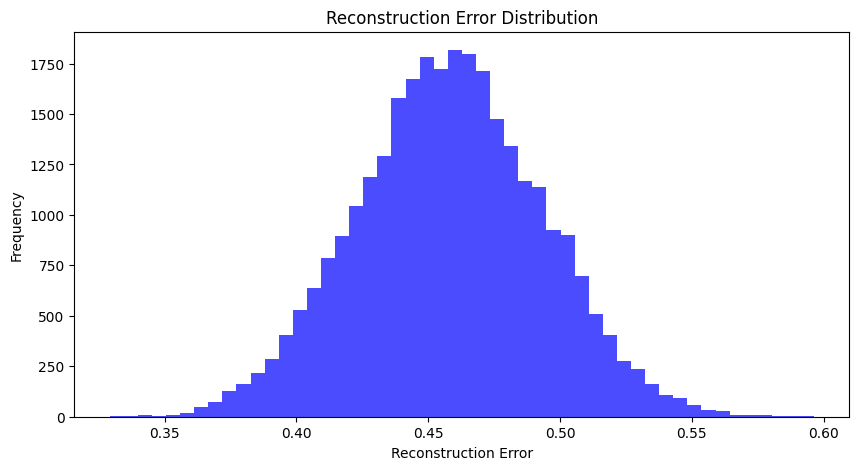

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the test sequences
X_test_pred = autoencoder.predict(X_test)

# Compute Reconstruction Error (MSE)
reconstruction_error = np.mean(np.abs(X_test_pred - X_test), axis=(1, 2))

# Plot Reconstruction Errors
plt.figure(figsize=(10, 5))
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='blue')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.show()


In [83]:
X_test_pred = autoencoder.predict(X_test)


920/920 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [84]:
threshold = np.percentile(reconstruction_error, 95)
print("Anomaly Detection Threshold:", threshold)


Anomaly Detection Threshold: 0.5158129657543451


In [85]:
anomalies = reconstruction_error > threshold
print("Number of anomalies:", np.sum(anomalies))


Number of anomalies: 1471


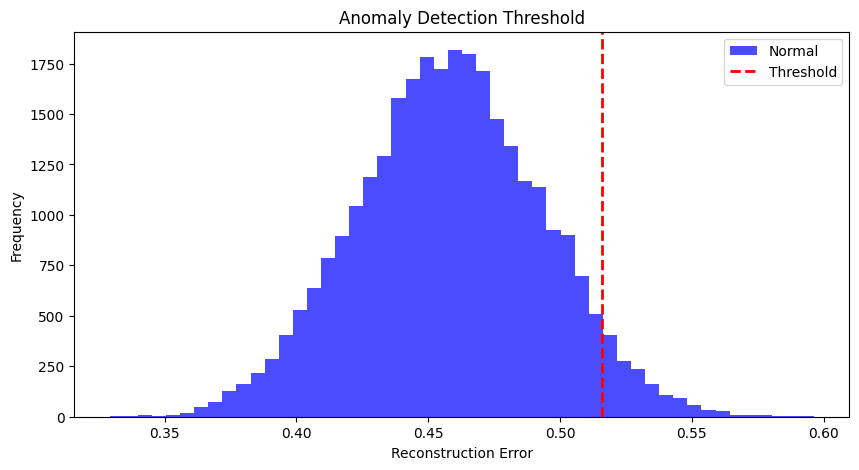

In [86]:
import matplotlib.pyplot as plt

# Mark normal and anomaly points
plt.figure(figsize=(10, 5))
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='blue', label="Normal")
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Threshold")
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Anomaly Detection Threshold')
plt.legend()
plt.show()


In [87]:
anomaly_indices = np.where(reconstruction_error > threshold)[0]
print("Anomalous data indices:", anomaly_indices[:10])  # Print first 10 anomalies


Anomalous data indices: [243 244 245 246 247 248 249 360 361 362]


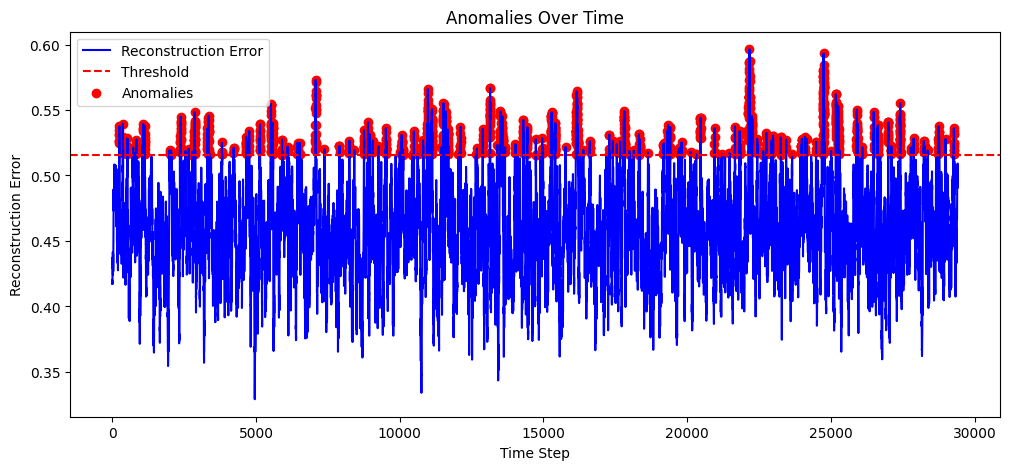

In [88]:
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error, label="Reconstruction Error", color="blue")
plt.axhline(threshold, color="red", linestyle="dashed", label="Threshold")
plt.scatter(anomaly_indices, reconstruction_error[anomaly_indices], color="red", label="Anomalies")
plt.xlabel("Time Step")
plt.ylabel("Reconstruction Error")
plt.title("Anomalies Over Time")
plt.legend()
plt.show()


In [89]:
np.save("anomalies.npy", anomaly_indices)


In [90]:
import numpy as np

# Compute new threshold using percentiles instead of std deviation
new_threshold = np.percentile(reconstruction_error, 95)  # Top 5% errors

print(f"New Anomaly Detection Threshold: {new_threshold}")


New Anomaly Detection Threshold: 0.5158129657543451


In [91]:
# Detect anomalies with new threshold
new_anomalies = reconstruction_error > new_threshold

print(f"Number of anomalies after tuning: {np.sum(new_anomalies)}")


Number of anomalies after tuning: 1471


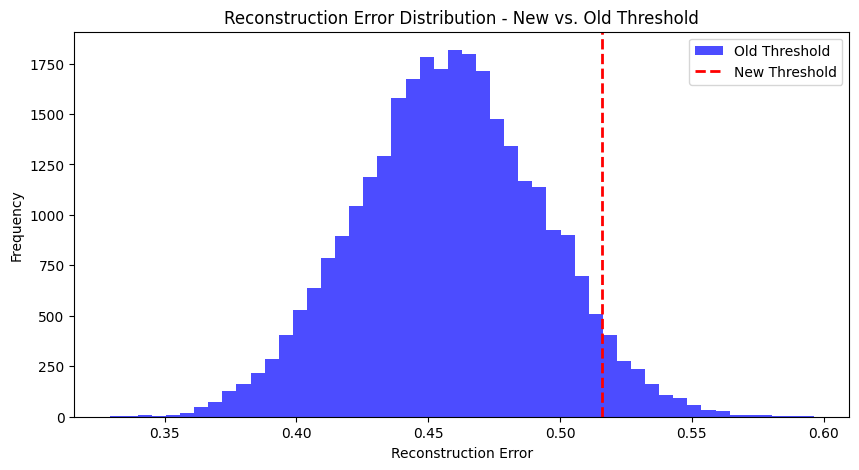

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='blue', label="Old Threshold")
plt.axvline(new_threshold, color='red', linestyle='dashed', linewidth=2, label="New Threshold")
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - New vs. Old Threshold')
plt.legend()
plt.show()



In [93]:
print(f"DF Shape: {df.shape}")
print(f"Anomalies Shape: {new_anomalies.shape}")

df_test = df.iloc[len(df) - len(new_anomalies):]  # Select only test data rows
df_test = df_test.copy()  # Avoid modifying original df

df_test["anomaly"] = new_anomalies  # Assign anomalies

anomalies_per_engine = df_test.groupby("unit")["anomaly"].sum()
print(anomalies_per_engine)


DF Shape: (61249, 19)
Anomalies Shape: (29416,)
unit
131     7
132    17
133    20
134    21
135     0
       ..
245     0
246    23
247     0
248     1
249    11
Name: anomaly, Length: 119, dtype: int64


# **Fine Tuning to reduce False Positives**

In [96]:
# Experiment with a stricter threshold
new_threshold = np.percentile(reconstruction_error, 99.5)  # Adjust percentile to be more selective

# Recalculate anomalies
new_anomalies = reconstruction_error > new_threshold

# Count anomalies per unit again
df_test["anomaly"] = new_anomalies
anomalies_per_engine = df_test.groupby("unit")["anomaly"].sum()
print(anomalies_per_engine)


unit
131    0
132    0
133    0
134    0
135    0
      ..
245    0
246    0
247    0
248    0
249    0
Name: anomaly, Length: 119, dtype: int64


In [97]:
# Smooth the reconstruction error using a moving average (window=5)
window_size = 5
smoothed_error = np.convolve(reconstruction_error, np.ones(window_size)/window_size, mode='valid')

# Apply thresholding on smoothed data
new_anomalies = smoothed_error > new_threshold

# Assign again and count
df_test = df_test.iloc[:len(new_anomalies)]  # Adjust length after smoothing
df_test["anomaly"] = new_anomalies
anomalies_per_engine = df_test.groupby("unit")["anomaly"].sum()
print(anomalies_per_engine)


unit
131    0
132    0
133    0
134    0
135    0
      ..
245    0
246    0
247    0
248    0
249    0
Name: anomaly, Length: 119, dtype: int64


<ipython-input-97-61a20e42de59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["anomaly"] = new_anomalies


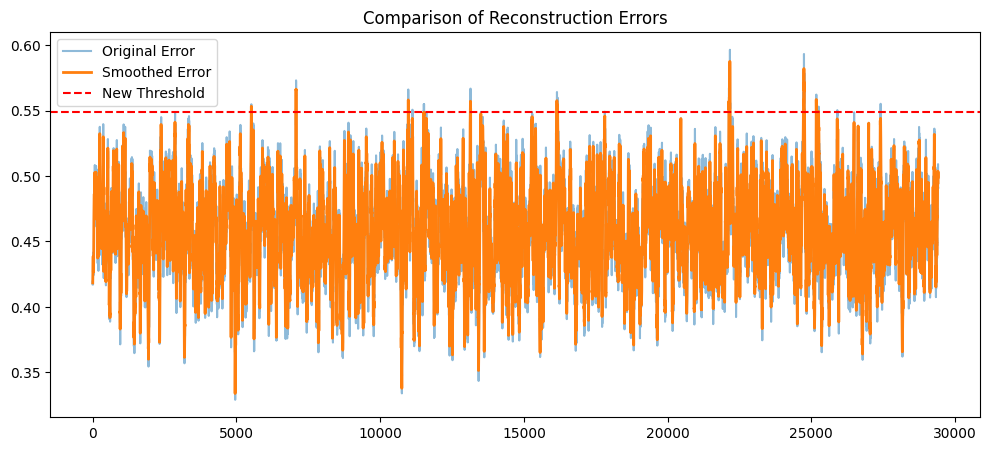

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error, label="Original Error", alpha=0.5)
plt.plot(smoothed_error, label="Smoothed Error", linewidth=2)
plt.axhline(new_threshold, color='red', linestyle="--", label="New Threshold")
plt.legend()
plt.title("Comparison of Reconstruction Errors")
plt.show()


**Increasing the Smoothing**

In [99]:
# Increase smoothing window
window_size = 15  # Try 10 or 15
smoothed_error = np.convolve(reconstruction_error, np.ones(window_size)/window_size, mode='valid')

# Apply threshold again
new_anomalies = smoothed_error > new_threshold

# Assign anomalies
df_test = df_test.iloc[:len(new_anomalies)]
df_test["anomaly"] = new_anomalies

# Count anomalies per engine again
anomalies_per_engine = df_test.groupby("unit")["anomaly"].sum()
print(anomalies_per_engine)


unit
131    0
132    0
133    0
134    0
135    0
      ..
245    0
246    0
247    0
248    0
249    0
Name: anomaly, Length: 119, dtype: int64


<ipython-input-99-095bbab668ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["anomaly"] = new_anomalies


In [100]:
import numpy as np

# Calculate rolling mean and std deviation
rolling_mean = pd.Series(reconstruction_error).rolling(window=20).mean()
rolling_std = pd.Series(reconstruction_error).rolling(window=20).std()

# Dynamic threshold = mean + (k * std dev)
k = 2.5  # Adjust this factor to tune sensitivity
dynamic_threshold = rolling_mean + (k * rolling_std)

# Detect anomalies
new_anomalies = reconstruction_error > dynamic_threshold

# Assign anomalies and count
df_test["anomaly"] = new_anomalies
anomalies_per_engine = df_test.groupby("unit")["anomaly"].sum()
print(anomalies_per_engine)


unit
131    0
132    0
133    0
134    0
135    0
      ..
245    0
246    0
247    0
248    0
249    0
Name: anomaly, Length: 119, dtype: object


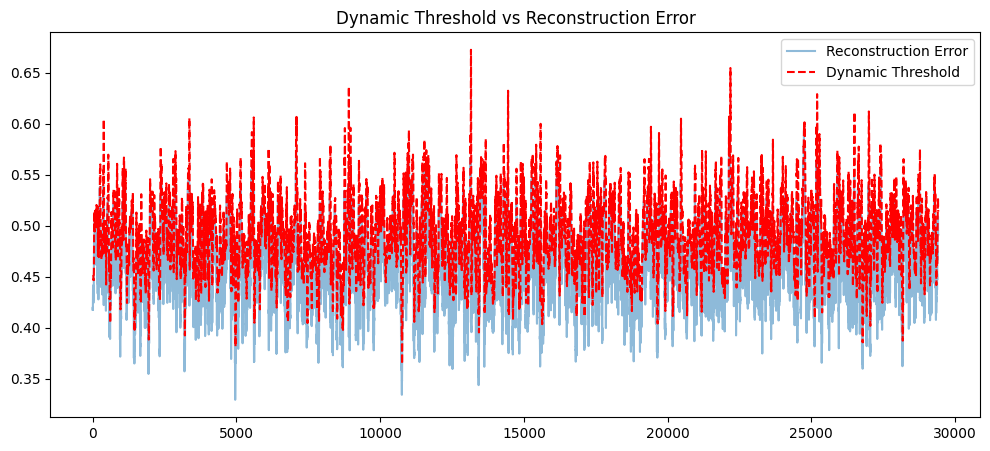

In [101]:
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error, label="Reconstruction Error", alpha=0.5)
plt.plot(dynamic_threshold, label="Dynamic Threshold", color='red', linestyle="--")
plt.legend()
plt.title("Dynamic Threshold vs Reconstruction Error")
plt.show()


In [102]:
# Adjust rolling window size and threshold sensitivity
rolling_mean = pd.Series(reconstruction_error).rolling(window=50).mean()
rolling_std = pd.Series(reconstruction_error).rolling(window=50).std()
k = 3  # Try increasing this to make it stricter
dynamic_threshold = rolling_mean + (k * rolling_std)


In [109]:
from scipy.ndimage import binary_opening

new_anomalies = new_anomalies[:len(df_test)]
df_test["anomaly"] = new_anomalies

df_test = df_test.iloc[:len(new_anomalies)]
df_test["anomaly"] = new_anomalies

print("DF Test Shape:", df_test.shape)
print("Reconstruction Error Length:", len(reconstruction_error))
print("New Anomalies Length:", len(new_anomalies))



DF Test Shape: (29402, 20)
Reconstruction Error Length: 29416
New Anomalies Length: 29402


In [110]:
reconstruction_error = reconstruction_error[:29402]  # Trim extra values


In [111]:
rolling_mean = pd.Series(reconstruction_error).rolling(window=50).mean()
rolling_std = pd.Series(reconstruction_error).rolling(window=50).std()
k = 3  # Adjust this as needed
dynamic_threshold = rolling_mean + (k * rolling_std)


In [112]:
df_test["anomaly"] = new_anomalies[:len(df_test)]


In [113]:
print("DF Test Shape:", df_test.shape)  # Should be (29402, 20)
print("Reconstruction Error Length:", len(reconstruction_error))  # Should be 29402
print("New Anomalies Length:", len(new_anomalies))  # Should be 29402


DF Test Shape: (29402, 20)
Reconstruction Error Length: 29402
New Anomalies Length: 29402


# ***Visualize the Anomaly Detection Results ***

In [121]:
df_test["reconstruction_error"] = reconstruction_error[:len(df_test)]


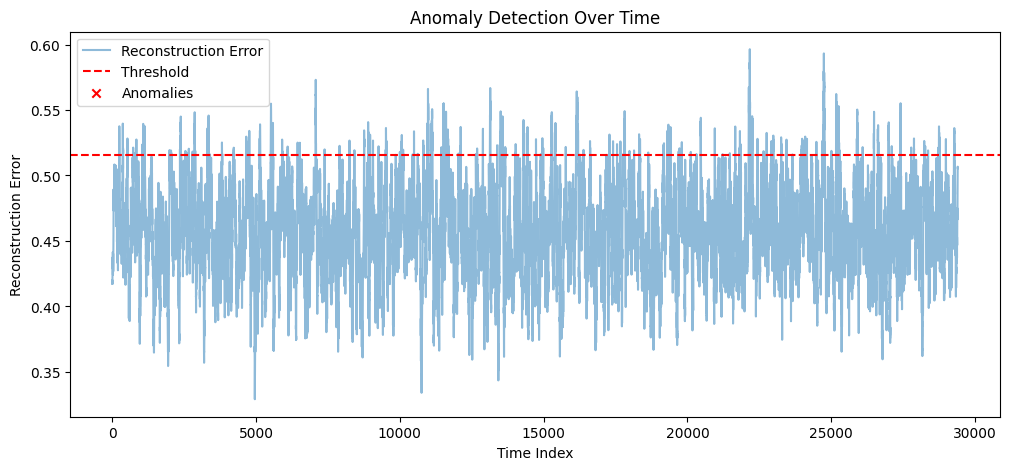

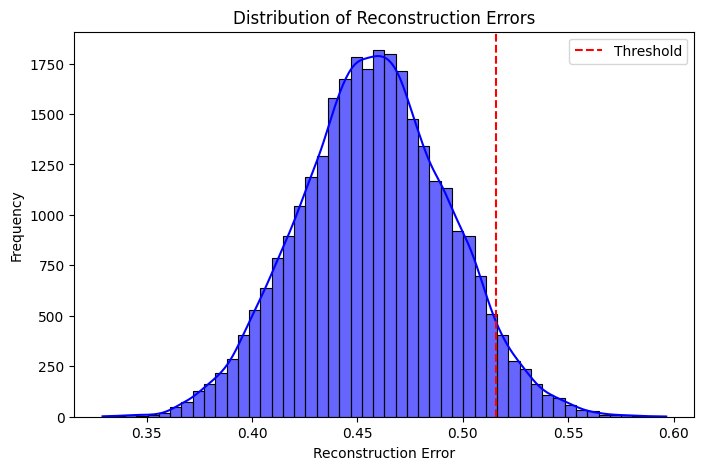

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time-series plot of anomalies
def plot_anomalies(df, reconstruction_error, threshold):
    plt.figure(figsize=(12, 5))
    plt.plot(reconstruction_error, label='Reconstruction Error', alpha=0.5)
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['reconstruction_error'],
                color='red', marker='x', label='Anomalies')
    plt.title('Anomaly Detection Over Time')
    plt.xlabel('Time Index')
    plt.ylabel('Reconstruction Error')
    plt.legend()
    plt.show()

# Distribution plot of reconstruction errors
def plot_error_distribution(reconstruction_error, threshold):
    plt.figure(figsize=(8, 5))
    sns.histplot(reconstruction_error, bins=50, kde=True, color='blue', alpha=0.6)
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('Distribution of Reconstruction Errors')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the functions (make sure df_test contains 'reconstruction_error' column)
plot_anomalies(df_test, reconstruction_error, threshold)
plot_error_distribution(reconstruction_error, threshold)


Index(['index', 'unit', 'time', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_19',
       'sensor_20', 'sensor_21', 'anomaly'],
      dtype='object')
